# Bayesian Statistics

In [1]:
import pymc3 as mc

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [31]:
mu = 4.
sigma = 2.
model = mc.Model()

In [32]:
with model:
    mc.Normal('X', mu, tau = 1/sigma**2)

In [33]:
model.vars

[X ~ Normal]

In [34]:
start = dict(X=2)
with model:
    step = mc.Metropolis()
    trace = mc.sample(10000, start=start, step=step)

/var/folders/09/zcndpz6n6jxbcrkqzlh7bclm0000gn/T/ipykernel_94469/3152925301.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = mc.sample(10000, start=start, step=step)
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [X]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 13 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [35]:
X = trace.get_values("X")

/Users/bernardocohen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability distribution')

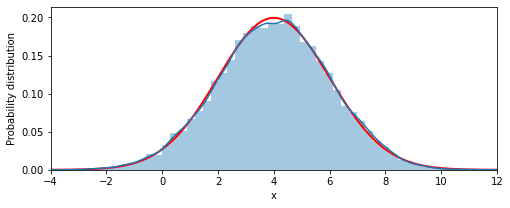

In [36]:
x = np.linspace(-4,12, 1000)
y = stats.norm(mu, sigma).pdf(x)
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(x,y,'r',lw=2)
sns.distplot(X, ax=ax)
ax.set_xlim(-4,12)
ax.set_xlabel("x")
ax.set_ylabel("Probability distribution")

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/bernardocohen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


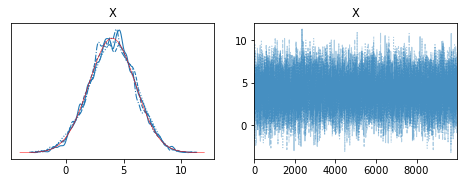

In [37]:
fig, axes = plt.subplots(1,2, figsize=(8,2.5), squeeze=False)
mc.plots.plot_trace(trace,axes=axes)
axes[0,0].plot(x,y,'r',lw=0.5)

In [53]:
model = mc.Model()
with model:
    mean = mc.Normal('mean', 3.0)
    sigma = mc.HalfNormal('sigma', sd=1.0)
    X = mc.Normal('X', mean, tau=sigma)

In [54]:
model.vars

[mean ~ Normal, sigma_log__ ~ TransformedDistribution, X ~ Normal]

In [55]:
with model:
    start = mc.find_MAP()
start

{'mean': array(3.),
 'sigma_log__': array(-0.34657365),
 'X': array(3.),
 'sigma': array(0.70710674)}

In [56]:
with model:
    step = mc.Metropolis()
    trace = mc.sample(100000, start = start, step=step)

/var/folders/09/zcndpz6n6jxbcrkqzlh7bclm0000gn/T/ipykernel_94469/703269850.py:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = mc.sample(100000, start = start, step=step)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [X]
>Metropolis: [sigma]
>Metropolis: [mean]


Sampling 4 chains for 1_000 tune and 100_000 draw iterations (4_000 + 400_000 draws total) took 70 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [57]:
trace.get_values('sigma').mean()

0.7988823361030631

In [58]:
X = trace.get_values('X')
X.mean()

3.0190123459133815

In [59]:
trace.get_values('X').std()

2.4816849654809174

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/bernardocohen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


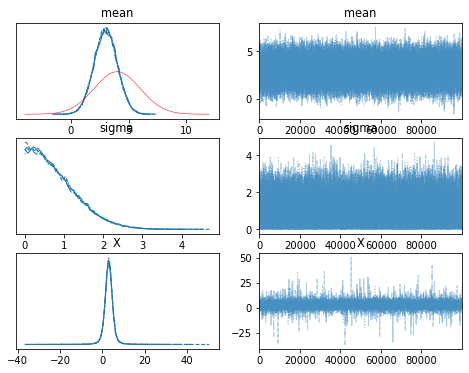

In [62]:
fig, axes = plt.subplots(3,2, figsize=(8,6), squeeze=False)
mc.plots.plot_trace(trace,var_names = ['mean','sigma','X'],axes=axes)
axes[0,0].plot(x,y,'r',lw=0.5)

In [63]:
mu = 2.5
s = 1.5
data = stats.norm(mu,s).rvs(100)

In [64]:
with mc.Model() as model:
    mean = mc.Normal('mean', 4., 1.)
    sigma = mc.HalfNormal('sigma',3.*np.sqrt(np.pi/2))
    X = mc.Normal('X', mean, 1/sigma**2, observed=data)

In [65]:
model.vars

[mean ~ Normal, sigma_log__ ~ TransformedDistribution]

In [66]:
with model:
    start = mc.find_MAP()
    step = mc.Metropolis()
    trace = mc.sample(100000, start=start, step=step)

/var/folders/09/zcndpz6n6jxbcrkqzlh7bclm0000gn/T/ipykernel_94469/3434656505.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = mc.sample(100000, start=start, step=step)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [sigma]
>Metropolis: [mean]


Sampling 4 chains for 1_000 tune and 100_000 draw iterations (4_000 + 400_000 draws total) took 58 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [67]:
start

{'mean': array(2.59238466),
 'sigma_log__': array(-0.18516878),
 'sigma': array(0.83096403)}

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/bernardocohen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


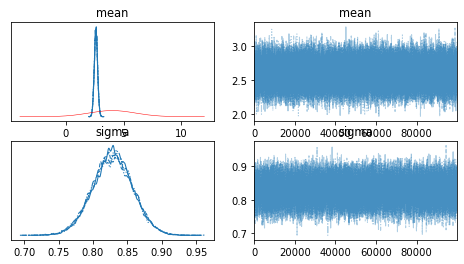

In [68]:
fig, axes = plt.subplots(2,2, figsize=(8,4), squeeze=False)
mc.plots.plot_trace(trace,var_names = ['mean','sigma'],axes=axes)
axes[0,0].plot(x,y,'r',lw=0.5)

In [69]:
mu, trace.get_values('mean').mean()

(2.5, 2.592976582763385)

In [70]:
s, trace.get_values('sigma').mean()

(1.5, 0.8281865381026768)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/bernardocohen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

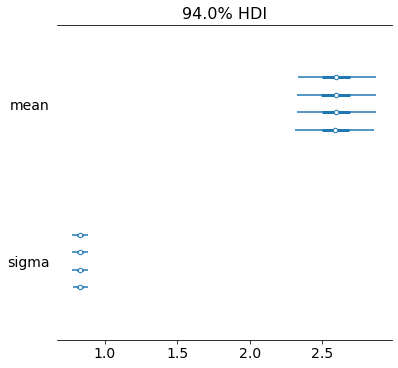

In [71]:
mc.plots.plot_forest(trace,var_names = ['mean','sigma'])

In [72]:
mc.summary(trace, var_names=['mean','sigma'])

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/bernardocohen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mean,2.593,0.145,2.322,2.868,0.001,0.0,66960.0,68032.0,1.0
sigma,0.828,0.029,0.774,0.885,0.000,0.0,40880.0,45608.0,1.0


In [73]:
dataset = sm.datasets.get_rdataset("Davis", "carData")

In [75]:
data = dataset.data[dataset.data.sex=="M"]
data = data[data.weight<110]
data.head(3)

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
3,M,68,177,70.0,175.0
5,M,76,170,76.0,165.0


In [76]:
model = smf.ols("height ~ weight", data = data)

In [77]:
result = model.fit()

Text(0, 0.5, 'height')

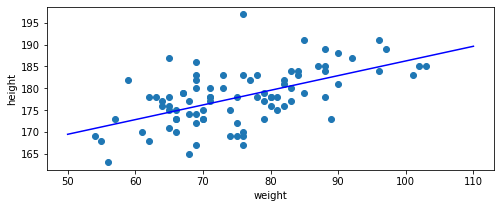

In [78]:
x = np.linspace(50,110,25)
y = result.predict({"weight":x})
fig, ax = plt.subplots(1,1,figsize=(8,3))
ax.plot(data.weight,data.height, 'o')
ax.plot(x,y,color="blue")
ax.set_xlabel("weight")
ax.set_ylabel("height")

In [79]:
with mc.Model() as model:
    sigma = mc.Uniform('sigma', 0, 10)
    intercept = mc.Normal('intercept', 125, sd=30)
    beta = mc.Normal('beta',0, sd=5)
    height_mu = intercept+beta*data.weight
    mc.Normal('height',mu = height_mu, sd=sigma, observed=data.height)
    predict_height = mc.Normal('predict_height', mu=intercept+beta*x, sd=sigma, shape=len(x))

In [80]:
model.vars

[sigma_interval__ ~ TransformedDistribution,
 intercept ~ Normal,
 beta ~ Normal,
 predict_height ~ Normal]

In [81]:
with model:
    start = mc.find_MAP()
    step = mc.NUTS()
    trace = mc.sample(10000, step, start=start)

/Users/bernardocohen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/pymc3/distributions/transforms.py:294: RuntimeWarning: divide by zero encountered in log
  return floatX(np.log(x - a) - np.log(b - x))
/var/folders/09/zcndpz6n6jxbcrkqzlh7bclm0000gn/T/ipykernel_94469/2779263318.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = mc.sample(10000, step, start=start)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [predict_height, beta, intercept, sigma]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 50 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8944876520759683, but should be close to 0.8. Try to increase the number of tuning steps.
There were 36 divergences after tuning. Increase `target_accept` or reparameterize.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/bernardocohen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>]], dtype=object)

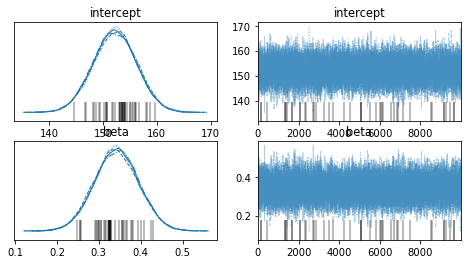

In [82]:
fig, axes = plt.subplots(2,2,figsize=(8,4), squeeze=False)
mc.plots.plot_trace(trace,var_names = ['intercept','beta'],axes=axes)

In [83]:
intercept = trace.get_values("intercept").mean()
intercept

152.1722460951491

In [85]:
beta = trace.get_values("beta").mean()
beta

0.3422590273332854

In [86]:
result.params

Intercept    152.617348
weight         0.336477
dtype: float64

In [87]:
result.predict({"weight":90}).values

array([182.90030002])

In [88]:
weight_index=np.where(x==90)[0][0]
trace.get_values("predict_height")[:, weight_index].mean()

182.93593191469816

/Users/bernardocohen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(3.200000000000003, 0.5, 'Probability distribution')

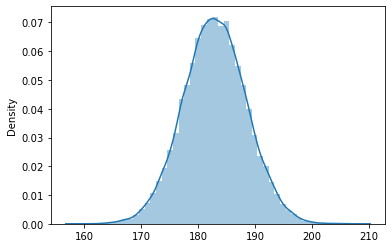

In [98]:
# fig, ax = plt.subplots(figsize=(8,3))
sns.distplot(trace.get_values("predict_height")[:,weight_index])
ax.set_xlim(150,120)
ax.set_xlabel("height")
ax.set_ylabel("Probability distribution")

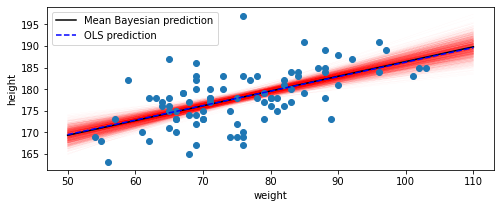

In [99]:
fig, ax = plt.subplots(1,1, figsize=(8,3))
for n in range(500, 2000, 1):
    intercept = trace.get_values("intercept")[n]
    beta = trace.get_values("beta")[n]
    ax.plot(x, intercept + beta*x, color='red', lw=0.25, alpha=0.05)
intercept = trace.get_values("intercept").mean()
beta = trace.get_values("beta").mean()
ax.plot(x, intercept+beta*x, color='k',label="Mean Bayesian prediction")
ax.plot(data.weight, data.height, 'o')
ax.plot(x,y,'--', color='blue', label="OLS prediction")
ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.legend(loc=0)

In [100]:
with mc.Model() as model:
    mc.glm.GLM.from_formula('height ~ weight', data)
    step = mc.NUTS()
    trace = mc.sample(2000, step)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/var/folders/09/zcndpz6n6jxbcrkqzlh7bclm0000gn/T/ipykernel_94469/3366608755.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = mc.sample(2000, step)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, weight, Intercept]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 17 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/bernardocohen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

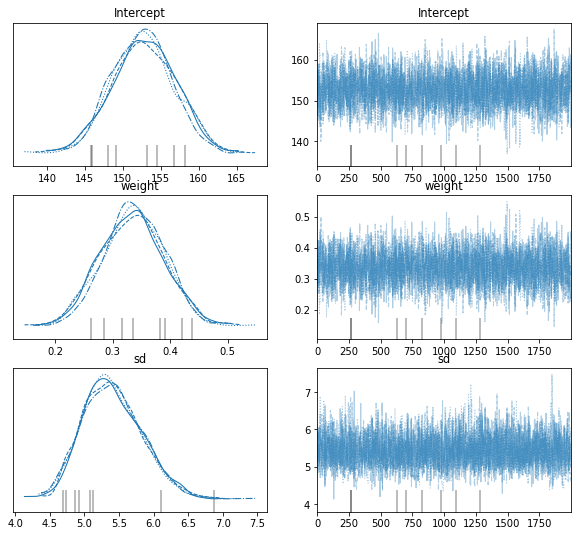

In [103]:
fig, axes = plt.subplots(3,2, figsize=(10,9), squeeze=False)
mc.plots.plot_trace(trace,var_names = ['Intercept','weight', 'sd'],axes=axes)

In [104]:
data = dataset.data.copy()
data = data[data.weight<110]
data['sex'] = data['sex'].apply(lambda x: 1 if x == "F" else 0)

In [106]:
with mc.Model() as model:
    intercept_mu, intercept_sigma = 125, 30
    beta_mu, beta_sigma = 0, 5
    
    intercept = mc.Normal('intercept', intercept_mu, sd=intercept_sigma, shape=2)
    beta = mc.Normal('beta', beta_mu, sd = beta_sigma, shape=2)
    error = mc.Uniform('error', 0, 10)
    sex_idx = data.sex.values
    height_mu = intercept[sex_idx]+beta[sex_idx]*data.weight
    mc.Normal('height', mu=height_mu, sd=error, observed=data.height)

In [107]:
model.vars

[intercept ~ Normal, beta ~ Normal, error_interval__ ~ TransformedDistribution]

In [108]:
with model:
    start = mc.find_MAP()
    step = mc.NUTS()
    trace = mc.sample(5000, step, start=start)

/var/folders/09/zcndpz6n6jxbcrkqzlh7bclm0000gn/T/ipykernel_94469/3945459653.py:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = mc.sample(5000, step, start=start)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [error, beta, intercept]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 31 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/bernardocohen/opt/anaconda3/envs/pymc3_env/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'error'}>,
        <AxesSubplot:title={'center':'error'}>]], dtype=object)

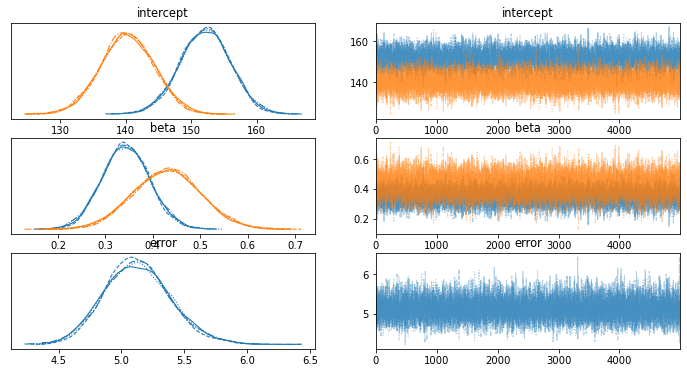

In [109]:
mc.plots.plot_trace(trace)

In [114]:
intercept_m, intercept_f = trace.get_values('intercept').mean(axis=0)
beta_m, beta_f = trace.get_values('beta').mean(axis=0)

In [115]:
intercept = trace.get_values('intercept').mean()
beta = trace.get_values('beta').mean()

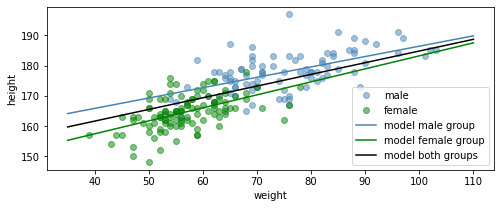

In [117]:
fig, ax = plt.subplots(1,1,figsize=(8,3))
mask_m = data.sex == 0
mask_f = data.sex == 1
ax.plot(data.weight[mask_m], data.height[mask_m], 'o',
       color="steelblue", label = "male", alpha=0.5)
ax.plot(data.weight[mask_f], data.height[mask_f], 'o',
       color="green", label = "female", alpha=0.5)

x = np.linspace(35,110,50)
ax.plot(x, intercept_m+x*beta_m, color="steelblue", label="model male group")
ax.plot(x, intercept_f+x*beta_f, color="green", label="model female group")
ax.plot(x, intercept+x*beta, color="black", label="model both groups")
ax.set_xlabel("weight")
ax.set_ylabel("height")
ax.legend(loc=0)

In [ ]:
q